In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [4]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 92% 61.0M/66.0M [00:00<00:00, 164MB/s]
100% 66.0M/66.0M [00:00<00:00, 155MB/s]


In [5]:
!unzip '*.zip'

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [9]:
card_df = pd.read_csv('/content/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
card_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
card_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
card_df.head(3).T

,0,1,2
Time,0.000000,0.000000,1.000000
V1,-1.359807,1.191857,-1.358354
V2,-0.072781,0.266151,-1.340163
V3,2.536347,0.166480,1.773209
V4,1.378155,0.448154,0.379780
V5,-0.338321,0.060018,-0.503198
V6,0.462388,-0.082361,1.800499
V7,0.239599,-0.078803,0.791461
V8,0.098698,0.085102,0.247676
V9,0.363787,-0.255425,-1.514654


In [20]:
card_df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

In [21]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time', axis=1,inplace=True)
  return df_copy

In [27]:
# 사전 데이터 가공 후 학습고 테스트 세트를 반환 함수

def get_train_test_dataset(df=None):
  df_copy = get_preprocessed_df(df)
  X_features = df_copy.iloc[:,:-1]
  y_target = df_copy.iloc[:,-1]

  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

  return X_train, X_test, y_train, y_test

In [28]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [31]:
print('학습 데이터 레이블 값 비율:', y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율:', y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율: 0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율: 0    99.826785
1     0.173215
Name: Class, dtype: float64


In [32]:
# 평가함수

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
import time

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  print('정확도:',accuracy , '정밀도:',precision, '재현율:',recall, 'f1:',f1)

In [33]:
# 인자로 사이킷런이 Estimator 객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 
# ML알고리즘 객체 전달 후 학습/예측/평가 함수
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  start_time =time.time()
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test,pred)
  print('수행시간:', time.time()-start_time)

In [36]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=900)
get_model_train_eval(lr_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85280    15]
 [   56    92]]
정확도: 0.99916903666772 정밀도: 0.8598130841121495 재현율: 0.6216216216216216 f1: 0.7215686274509804
수행시간: 29.868433713912964


In [41]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators =1000, num_leaves = 64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995084442259752 정밀도: 0.9491525423728814 재현율: 0.7567567567567568 f1: 0.8421052631578948
수행시간: 37.000715017318726


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators =1000, n_jobs = -1)
get_model_train_eval(rf_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85290     5]
 [   40   108]]
정확도: 0.9994733330992591 정밀도: 0.9557522123893806 재현율: 0.7297297297297297 f1: 0.8275862068965517
수행시간: 1391.3936467170715


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


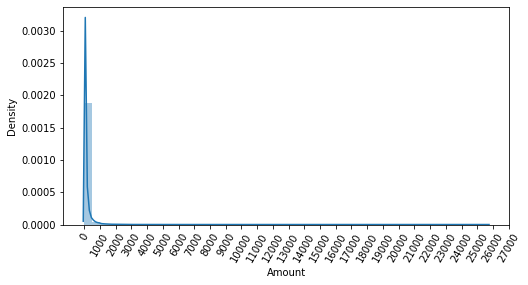

In [45]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [46]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  df_copy.insert(0,'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1,inplace=True)
  return df_copy

In [47]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [48]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=900)
get_model_train_eval(lr_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85281    14]
 [   58    90]]
정확도: 0.9991573329588147 정밀도: 0.8653846153846154 재현율: 0.6081081081081081 f1: 0.7142857142857144
수행시간: 2.530824661254883


In [49]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators =1000, num_leaves = 64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85289     6]
 [   36   112]]
정확도: 0.9995084442259752 정밀도: 0.9491525423728814 재현율: 0.7567567567567568 f1: 0.8421052631578948
수행시간: 31.73872685432434


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators =1000, n_jobs = -1)
get_model_train_eval(rf_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85288     7]
 [   32   114]]
정확도: 0.9995435446682506 정밀도: 0.9421487603305785 재현율: 0.7808219178082192 f1: 0.8539325842696629
수행시간: 1583.0052163600922


# 이상치 제거 함수

In [50]:
def get_outlier(df=None, column=None, weight=1.5):
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)

  iqr = quantile_75-quantile_25
  iqr_weight = iqr*weight
  lowest_val =quantile_25-iqr_weight
  heigest_val =quantile_75+iqr_weight
  outlier_index = fraud[(fraud<lowest_val) | (fraud>heigest_val)].index
  return outlier_index

In [52]:
outlier_index = get_outlier(df=card_df, column='V14')
print('이상치 인덱스', outlier_index)

이상치 인덱스 Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [53]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
  df_copy = df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  df_copy.insert(0,'Amount_Scaled', amount_n)
  df_copy.drop(['Time','Amount'], axis=1,inplace=True)

  outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

In [54]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [55]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=900)
get_model_train_eval(lr_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85279    16]
 [   48    98]]
정확도: 0.9992509450966164 정밀도: 0.8596491228070176 재현율: 0.6712328767123288 f1: 0.7538461538461538
수행시간: 4.527498245239258


In [56]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators =1000, num_leaves = 64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85290     5]
 [   26   120]]
정확도: 0.9996371765311736 정밀도: 0.96 재현율: 0.821917808219178 f1: 0.8856088560885609
수행시간: 31.799846410751343


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators =1000, n_jobs = -1)
get_model_train_eval(rf_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[85288     7]
 [   31   115]]
정확도: 0.999555248651116 정밀도: 0.9426229508196722 재현율: 0.7876712328767124 f1: 0.8582089552238806
수행시간: 1265.4451096057892


# SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 0    199020
1    199020
Name: Class, dtype: int64


In [61]:
print('\n### 로지스틱 회귀 에측 성능 ###')
lr_clf = LogisticRegression(max_iter=900)
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over,tgt_test= y_test )

print('\n### LightGBM ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average= np.False_)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over,tgt_test= y_test )




### 로지스틱 회귀 에측 성능 ###
오차행렬
[[82936  2359]
 [   11   135]]
정확도: 0.9722615606090753 정밀도: 0.0541299117882919 재현율: 0.9246575342465754 f1: 0.10227272727272728
수행시간: 8.640335321426392

### LightGBM ###
오차행렬
[[85283    12]
 [   24   122]]
정확도: 0.9995786566168468 정밀도: 0.9104477611940298 재현율: 0.8356164383561644 f1: 0.8714285714285713
수행시간: 73.87547302246094


In [68]:
print('\n### RandomForest 예측 성능 ###')
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)


### RandomForest 예측 성능 ###
오차행렬
[[85283    12]
 [   24   122]]
정확도: 0.9995786566168468 정밀도: 0.9104477611940298 재현율: 0.8356164383561644 f1: 0.8714285714285713
수행시간: 2206.627214193344


# feature 별 중요도

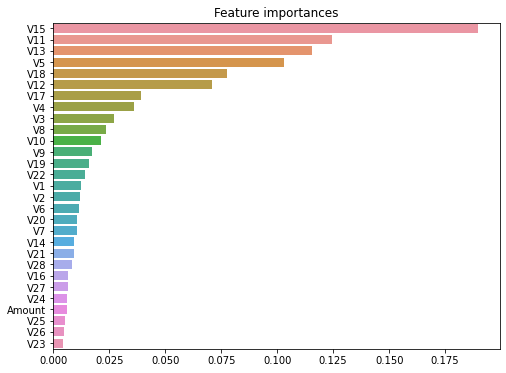

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

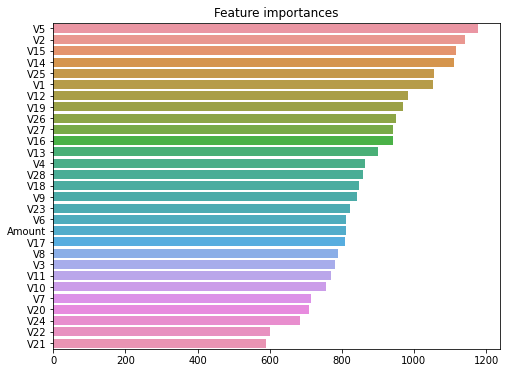

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=card_df.columns[1:-1])
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()